In [497]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [498]:
diabetes = pd.read_csv('diabetes.csv')

In [499]:
diabetes.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [500]:
y = diabetes["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [501]:
X = diabetes.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [502]:
fig = px.scatter(x=diabetes['Age'], y=diabetes['BloodPressure'])
fig.show()

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [504]:
X.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

In [505]:
# Create a StandardScater model and fit it to the training data

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [506]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [507]:
# putting the scaled data into a pickle file to use in the web app
pickle.dump(scaler,open('scaling.pkl', 'wb'))

k: 1, Train/Test Score: 1.000/0.695
k: 3, Train/Test Score: 0.834/0.727
k: 5, Train/Test Score: 0.816/0.799
k: 7, Train/Test Score: 0.800/0.812
k: 9, Train/Test Score: 0.783/0.779
k: 11, Train/Test Score: 0.780/0.773
k: 13, Train/Test Score: 0.765/0.799
k: 15, Train/Test Score: 0.767/0.799
k: 17, Train/Test Score: 0.772/0.799
k: 19, Train/Test Score: 0.782/0.792


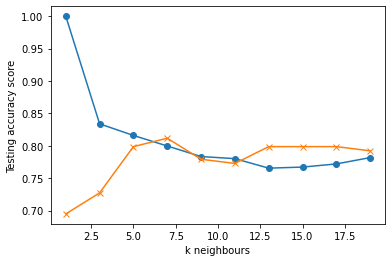

In [508]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbours")
plt.ylabel("Testing accuracy score")
plt.show()

In [509]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.812


In [510]:
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [511]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [512]:
confusion_matrix(y_true, y_pred)

array([[88, 11],
       [18, 37]], dtype=int64)

In [513]:
X_test_prediction = knn.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [514]:
test_data_accuracy

0.8116883116883117

In [546]:
pickle.dump(knn, open('knnmodel.pkl', 'wb'))

In [547]:
pickled_model = pickle.load(open('knnmodel.pkl', 'rb'))

In [548]:
Pregnancies=8

In [549]:
Glucose=183

In [550]:
BloodPressure=64

In [551]:
SkinThickness=0

In [552]:
Insulin=0

In [553]:
BMI=23.3

In [554]:
DiabetesPedigreeFunction=0.672

In [555]:
Age=32

In [556]:
predict_example = (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)

In [557]:
input_data_as_numpy_array = np.asarray(predict_example)


In [558]:
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


In [559]:
std_data = scaler.transform(input_data_reshape)
prediction = knn.predict(std_data)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [560]:
prediction

array([1], dtype=int64)

In [463]:
predict_example = (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)

In [464]:
predict_example_asarray = np.asarray(predict_example)

In [466]:
answer = pickled_model.predict(X_scaler.transform(predict_example_asarray.reshape(1,-1)))

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [468]:
answer[0]

1

In [52]:
predict_example_asarray = np.asarray(predict_example)

In [53]:
answer = pickled_model.predict(X_scaler.transform(predict_example_asarray.reshape(1,-1)))

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
answer[0]

0